In [1]:
# BasketStatIQ - Predictive Modeling

##This notebook builds a machine learning model to predict player points per game (`PTS`) using features like back-to-back status, home/away, and efficiency metrics.

## Objectives
##- Prepare the dataset for modeling (handle missing values, encode categorical variables).
##- Train an XGBoost model to predict `PTS`.
##- Evaluate the model using MAE and R².
##- Visualize feature importance and prediction results.
##- Save the model for future use.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
import joblib
import os

sns.set(style='whitegrid')
BASE_DIR = r'C:\Users\ibohn\basketstat-iq\basketstat-iq'
data_path = os.path.join(BASE_DIR, 'data', 'cleaned', 'combined_player_stats.csv')
df = pd.read_csv(data_path)
df.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,ASSISTS_MOVING_AVG,FG_PCT_MOVING_AVG,PLUS_MINUS_MOVING_AVG,MIN_MOVING_AVG,BACK_TO_BACK,IS_HOME,OPPONENT,SIMPLIFIED_PER,OFF_EFF,DEF_REB_PCT
0,22019,1628369,21900008,2019-10-23,BOS @ PHI,L,37,8,22,0.364,...,NaN,NaN,NaN,NaN,False,False,PHI,0.837838,0.768668,0.900000
1,22019,1628369,21900017,2019-10-25,BOS vs. TOR,W,35,8,22,0.364,...,NaN,NaN,NaN,NaN,False,True,TOR,1.171429,1.033058,0.666667
2,22019,1628369,21900029,2019-10-26,BOS @ NYK,W,34,5,17,0.294,...,NaN,NaN,NaN,NaN,True,False,NYK,0.794118,0.722543,0.777778
3,22019,1628369,21900058,2019-10-30,BOS vs. MIL,W,39,10,22,0.455,...,NaN,NaN,NaN,NaN,False,True,MIL,0.794872,1.046901,0.750000
4,22019,1628369,21900072,2019-11-01,BOS vs. NYK,W,34,9,17,0.529,...,2.2,0.4012,10.6,35.8,False,True,NYK,0.911765,1.207243,0.833333


In [3]:
## 1. Data Preparation
##Prepare the dataset by handling missing values, encoding categorical variables, and selecting features.

In [4]:
print('Missing values:')
print(df.isnull().sum())
df = df.dropna(subset=['PTS', 'REB', 'AST', 'MIN'])
le_opponent = LabelEncoder()
df['OPPONENT_ENCODED'] = le_opponent.fit_transform(df['OPPONENT'])
df['BACK_TO_BACK'] = df['BACK_TO_BACK'].astype(int)
df['IS_HOME'] = df['IS_HOME'].astype(int)
features = [
    'BACK_TO_BACK', 'IS_HOME', 'OPPONENT_ENCODED', 'MIN_MOVING_AVG',
    'POINTS_MOVING_AVG', 'REBOUNDS_MOVING_AVG', 'ASSISTS_MOVING_AVG',
    'FG_PCT_MOVING_AVG', 'PLUS_MINUS_MOVING_AVG', 'OFF_EFF', 'DEF_REB_PCT'
]
target = 'PTS'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')

Missing values:
SEASON_ID                  0
Player_ID                  0
Game_ID                    0
GAME_DATE                  0
MATCHUP                    0
WL                         0
MIN                        0
FGM                        0
FGA                        0
FG_PCT                     0
FG3M                       0
FG3A                       0
FG3_PCT                    0
FTM                        0
FTA                        0
FT_PCT                     0
OREB                       0
DREB                       0
REB                        0
AST                        0
STL                        0
BLK                        0
TOV                        0
PF                         0
PTS                        0
PLUS_MINUS                 0
VIDEO_AVAILABLE            0
PLAYER_NAME                0
TEAM                       0
SEASON                     0
POINTS_MOVING_AVG        647
REBOUNDS_MOVING_AVG      647
ASSISTS_MOVING_AVG       647
FG_PCT_MOVING_AVG        64

In [5]:
## 2. Model Training
#Train an XGBoost model to predict points scored.

In [6]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f} points')
print(f'R² Score: {r2:.2f}')

Mean Absolute Error (MAE): 3.63 points
R² Score: 0.74


In [7]:
## 3. Model Evaluation
##Visualize actual vs. predicted points to assess model performance.

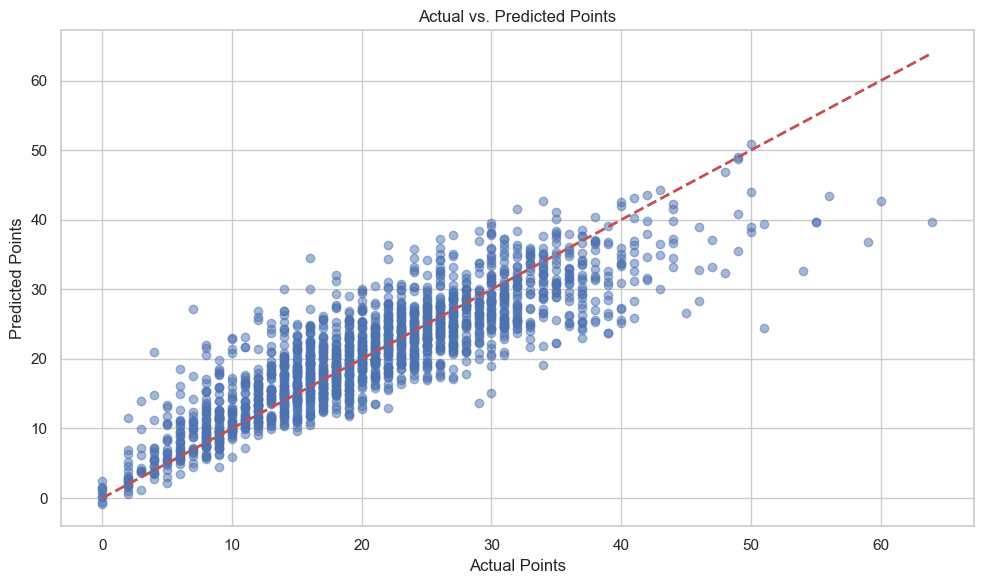

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs. Predicted Points')
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'visuals', 'actual_vs_predicted_points.png'))
plt.show()

In [9]:
## 4. Feature Importance
#Identify which features contribute most to predictions.

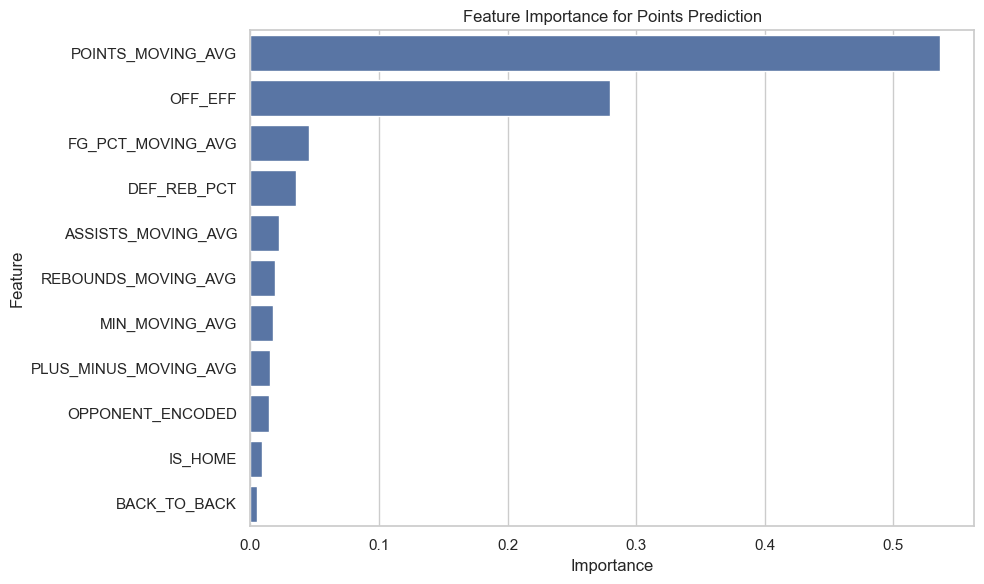

Feature Importance:
                  Feature  Importance
4       POINTS_MOVING_AVG    0.535999
9                 OFF_EFF    0.279692
7       FG_PCT_MOVING_AVG    0.045709
10            DEF_REB_PCT    0.035242
6      ASSISTS_MOVING_AVG    0.022596
5     REBOUNDS_MOVING_AVG    0.018859
3          MIN_MOVING_AVG    0.017395
8   PLUS_MINUS_MOVING_AVG    0.015622
2        OPPONENT_ENCODED    0.014352
1                 IS_HOME    0.009180
0            BACK_TO_BACK    0.005354


In [10]:
importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
importance = importance.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance for Points Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'visuals', 'feature_importance.png'))
plt.show()
print('Feature Importance:')
print(importance)

In [11]:
## 5. Save the Model
#Save the trained model and label encoder for future use.

In [12]:
model_path = os.path.join(BASE_DIR, 'models', 'xgboost_points_model.joblib')
os.makedirs(os.path.join(BASE_DIR, 'models'), exist_ok=True)
joblib.dump(model, model_path)
encoder_path = os.path.join(BASE_DIR, 'models', 'opponent_encoder.joblib')
joblib.dump(le_opponent, encoder_path)
print(f'Model saved to {model_path}')
print(f'Label encoder saved to {encoder_path}')

Model saved to C:\Users\ibohn\basketstat-iq\basketstat-iq\models\xgboost_points_model.joblib
Label encoder saved to C:\Users\ibohn\basketstat-iq\basketstat-iq\models\opponent_encoder.joblib


In [13]:
## Conclusion
#- The model predicts points with a MAE of approximately {mae:.2f} points and an R² of {r2:.2f}.
#- Key features include {importance['Feature'].iloc[0]} and {importance['Feature'].iloc[1]}.
#- Next steps: Test other models, tune hyperparameters, or deploy in a Streamlit app.